<a href="https://colab.research.google.com/github/prabhat-parth/Classical_machine_learning_on_COVID-19/blob/master/classical_machine_learning_on_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library addition
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:
#data read
clinicalInput = pd.read_excel("/content/drive/My Drive/Covid-19 Dataset/Balanced Data Set.xlsx")

In [ ]:
#determine the number of classes(labels)
label_encoder = LabelEncoder().fit(clinicalInput.Label)
labels = label_encoder.transform(clinicalInput.Label)
classes = list(label_encoder.classes_)

In [ ]:
#data preparation
clinicalOutput = clinicalInput["Label"]
clinicalInput = clinicalInput.drop(["Patient ID", "Patient age quantile","Label"],axis=1)

In [ ]:
#determine number of features and classes
nb_features = 18
nb_classes = len(classes)

In [ ]:
#Standardization of train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(clinicalInput.values)
train = scaler.transform(clinicalInput.values)

In [ ]:
#split train data into validation and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clinicalInput, labels, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((480, 18), (120, 18))

In [ ]:
y_train.shape, y_test.shape

((480,), (120,))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [ ]:
classifiers = [
    linear_model.LogisticRegression(),
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    ]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import plot_roc_curve

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression
****Results****
Accuracy: 90.8333%
Log Loss: 0.23775203817159904
[[104   6]
 [  5   5]]
0.9083333333333333
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.45      0.50      0.48        10

    accuracy                           0.91       120
   macro avg       0.70      0.72      0.71       120
weighted avg       0.91      0.91      0.91       120

--- 0.04911541938781738 seconds ---
10-fold validation test
0.8708333333333332
Get performance metrics
Accuracy: 0.908333
Precision: 0.454545
Recall: 0.500000
F1 score: 0.476190
Cohens kappa: 0.426087
ROC AUC: 0.722727
[[

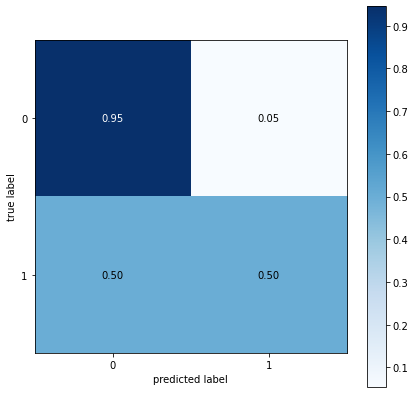

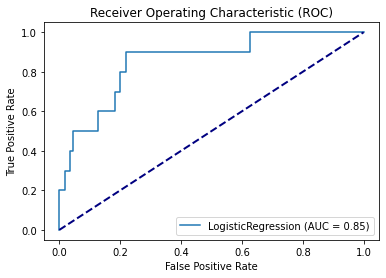

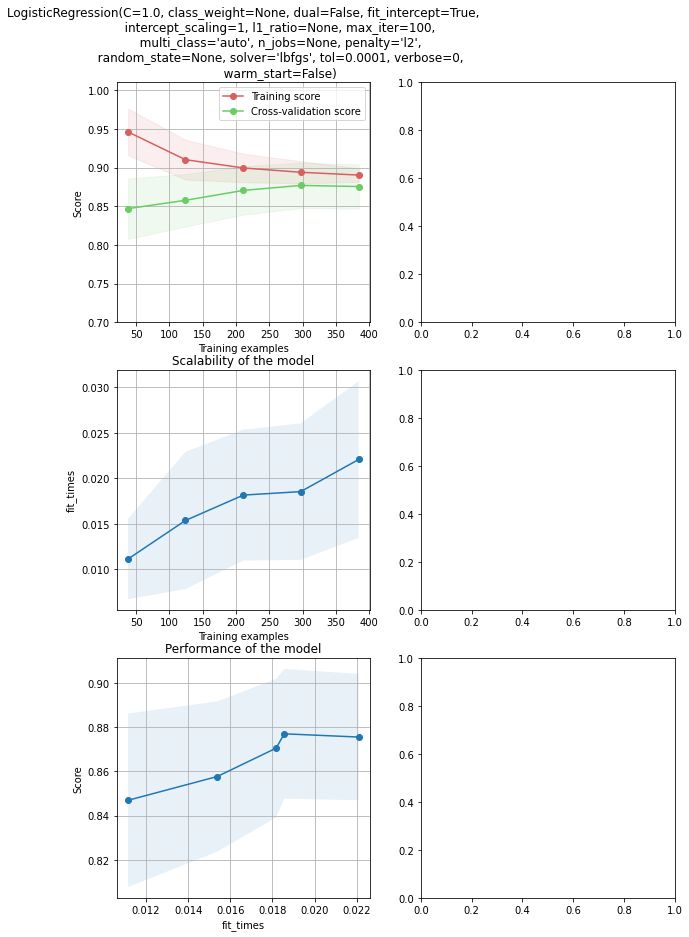

complete !!!
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier
****Results****
Accuracy: 91.6667%
Log Loss: 0.4812798922434477
[[104   6]
 [  4   6]]
0.9166666666666666
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       110
           1       0.50      0.60      0.55        10

    accuracy                           0.92       120
   macro avg       0.73      0.77      0.75       120
weighted avg       0.92      0.92      0.92       120

--- 0.06120467185974121 seconds ---
10-fold validation test
0.8625
Get performance metrics
Accuracy: 0.916667
Precision: 0.500000
Recall: 0.600000
F1 score: 0.545455
Cohens kappa: 0.500000
ROC AUC: 0.772727
[[104   6]
 [  4   6]]


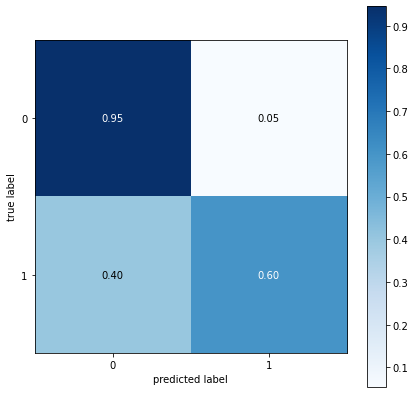

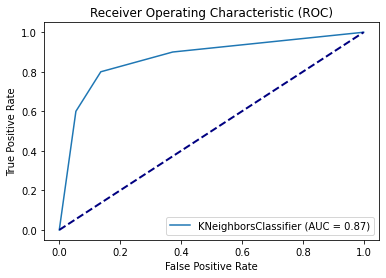

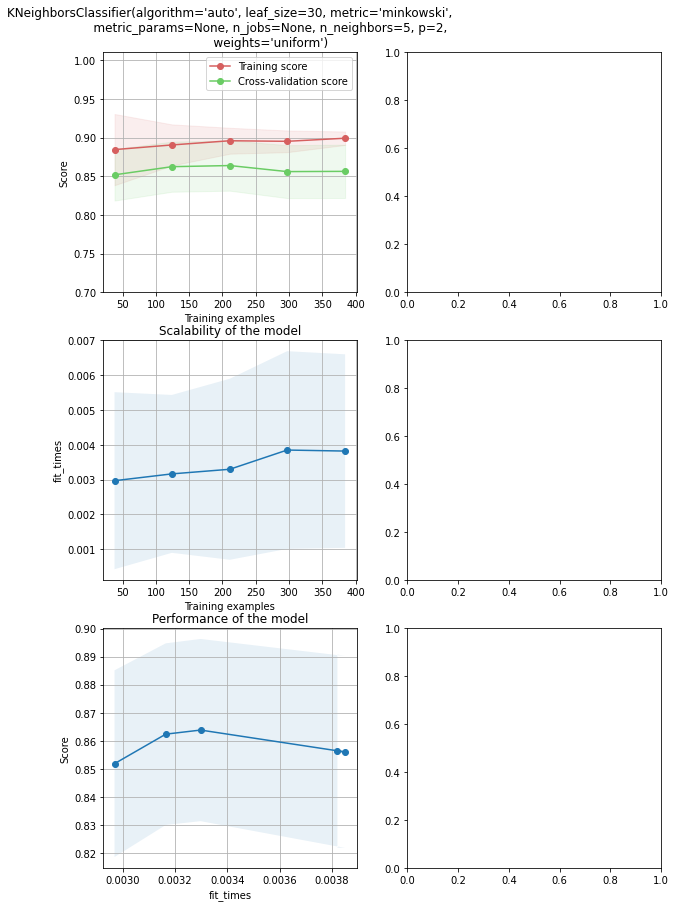

complete !!!
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
SVC
****Results****
Accuracy: 91.6667%
Log Loss: 0.1728920675933363
[[110   0]
 [ 10   0]]
0.9166666666666666
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       110
           1       0.00      0.00      0.00        10

    accuracy                           0.92       120
   macro avg       0.46      0.50      0.48       120
weighted avg       0.84      0.92      0.88       120

--- 0.0793159008026123 seconds ---
10-fold validation test


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8541666666666666
Get performance metrics
Accuracy: 0.916667
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
Cohens kappa: 0.000000
ROC AUC: 0.500000
[[110   0]
 [ 10   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


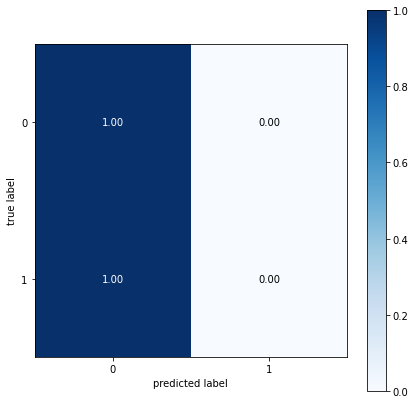

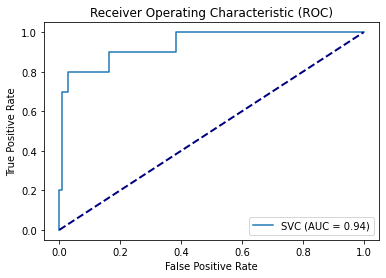

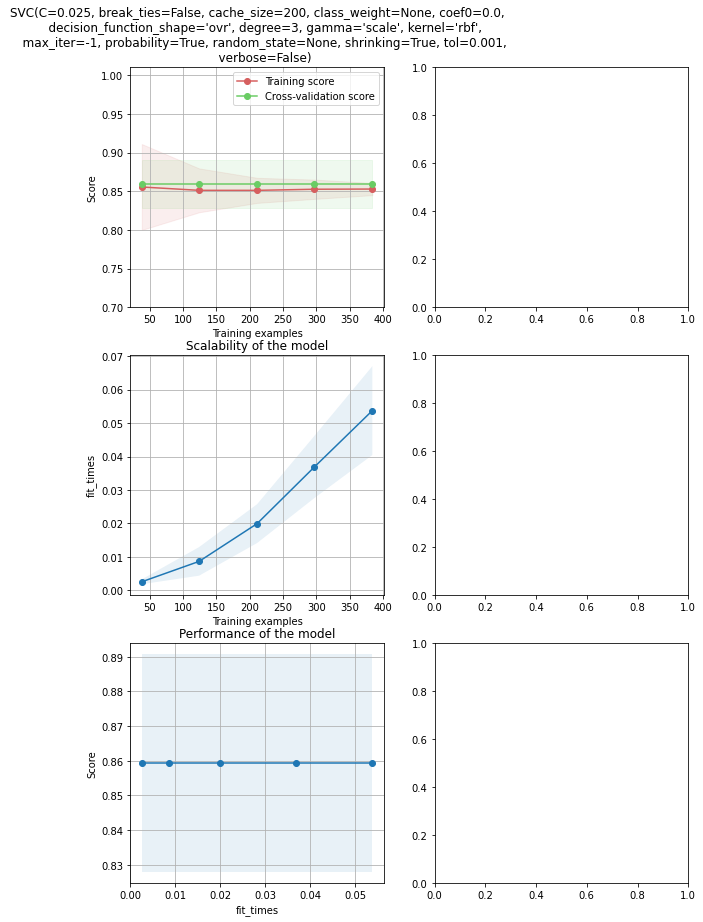

complete !!!
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DecisionTreeClassifier
****Results****
Accuracy: 80.8333%
Log Loss: 6.619932142357881
[[88 22]
 [ 1  9]]
0.8083333333333333
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       110
           1       0.29      0.90      0.44        10

    accuracy                           0.81       120
   macro avg       0.64      0.85      0.66       120
weighted avg       0.93      0.81      0.85       120

--- 0.052202701568603516 seconds ---
10-fold validation test
0.81875
Get performance metrics
Accuracy: 0.8083

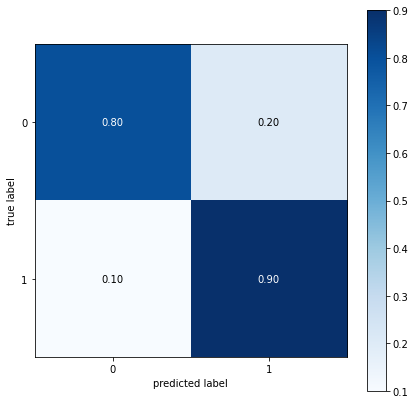

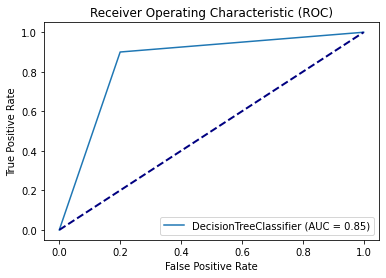

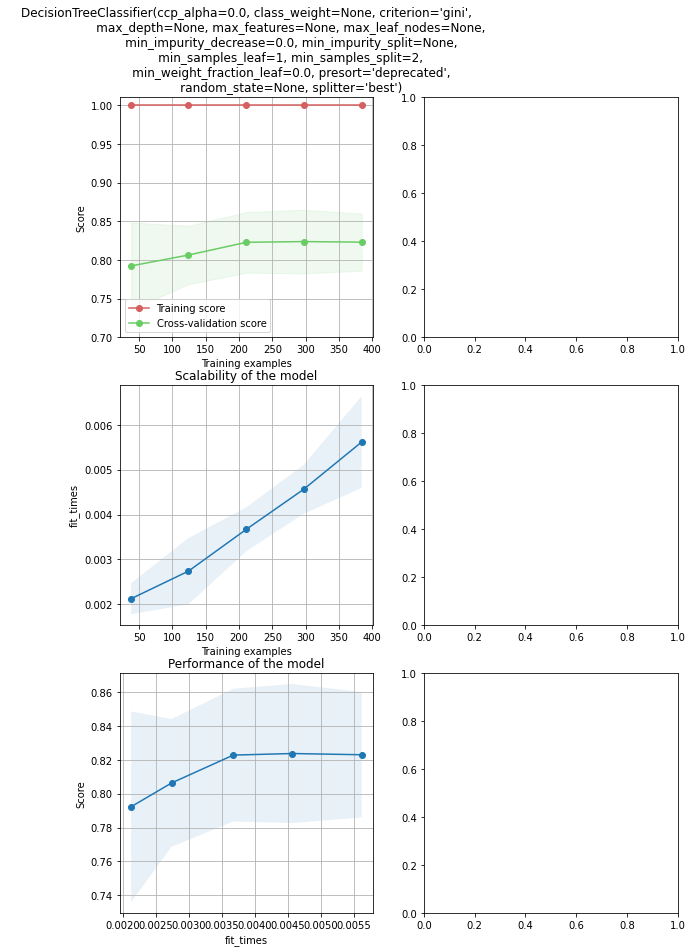

complete !!!
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestClassifier
****Results****
Accuracy: 94.1667%
Log Loss: 0.20798748439846582
[[106   4]
 [  3   7]]
0.9416666666666667
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       110
           1       0.64      0.70      0.67        10

    accuracy                           0.94       120
   macro avg       0.80      0.83      0.82       120
weighted avg       0.94      0.94     

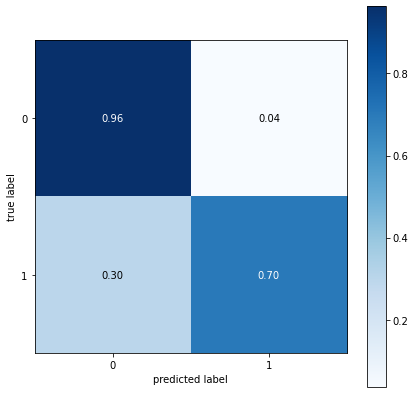

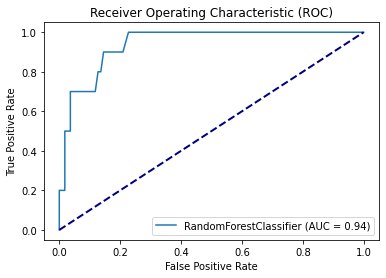

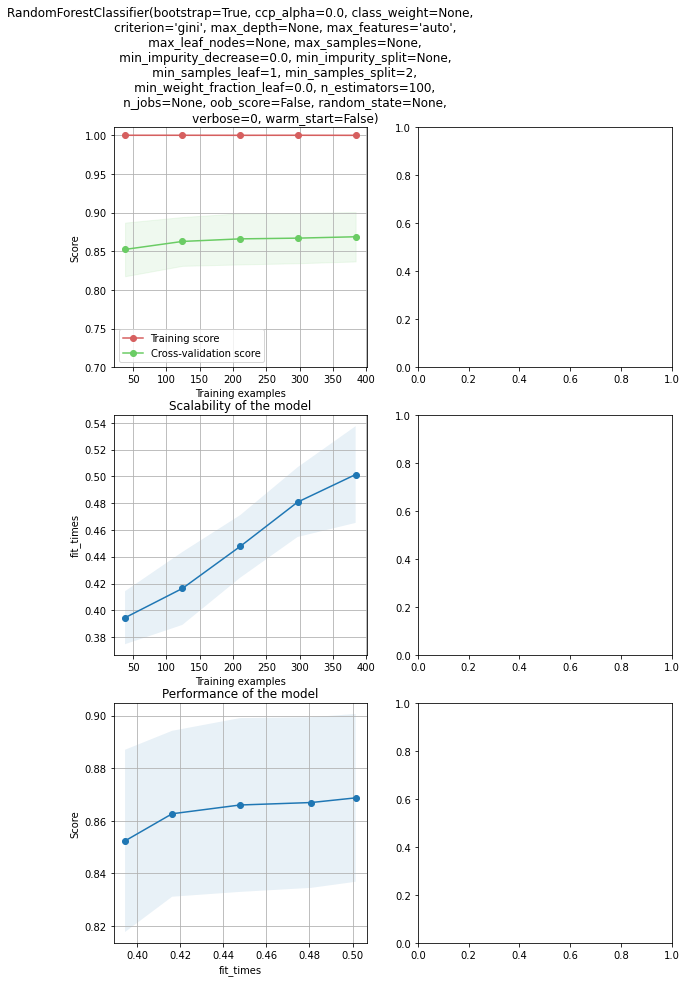

complete !!!
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
AdaBoostClassifier
****Results****
Accuracy: 88.3333%
Log Loss: 0.5877958156817715
[[100  10]
 [  4   6]]
0.8833333333333333
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       110
           1       0.38      0.60      0.46        10

    accuracy                           0.88       120
   macro avg       0.67      0.75      0.70       120
weighted avg       0.91      0.88      0.90       120

--- 0.31604623794555664 seconds ---
10-fold validation test
0.83125
Get performance metrics
Accuracy: 0.883333
Precision: 0.375000
Recall: 0.600000
F1 score: 0.461538
Cohens kappa: 0.400000
ROC AUC: 0.754545
[[100  10]
 [  4   6]]


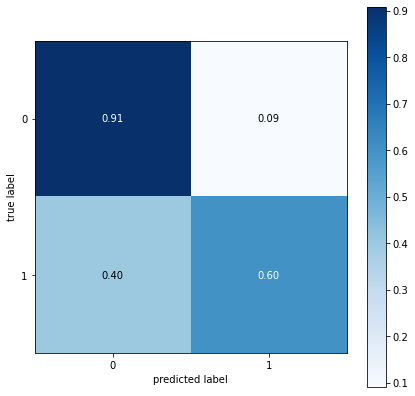

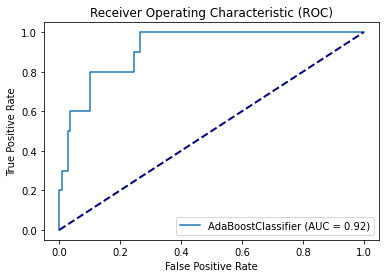

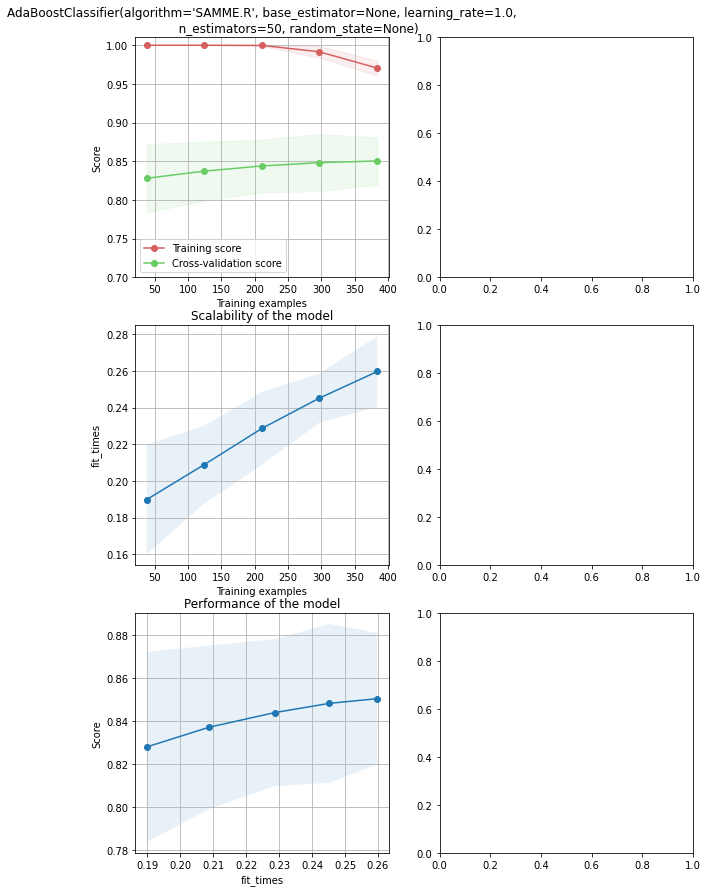

complete !!!
GaussianNB(priors=None, var_smoothing=1e-09)
GaussianNB
****Results****
Accuracy: 90.0000%
Log Loss: 0.4234817224886965
[[101   9]
 [  3   7]]
0.9
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       110
           1       0.44      0.70      0.54        10

    accuracy                           0.90       120
   macro avg       0.70      0.81      0.74       120
weighted avg       0.93      0.90      0.91       120

--- 0.05043148994445801 seconds ---
10-fold validation test
0.8270833333333332
Get performance metrics
Accuracy: 0.900000
Precision: 0.437500
Recall: 0.700000
F1 score: 0.538462
Cohens kappa: 0.485714
ROC AUC: 0.809091
[[101   9]
 [  3   7]]


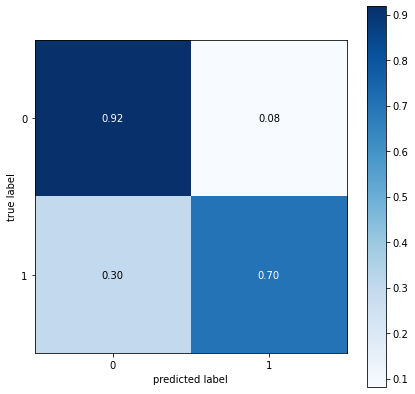

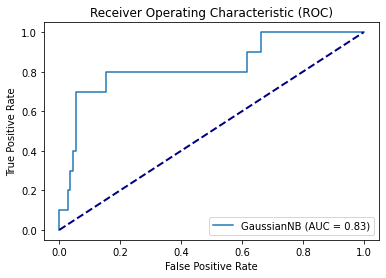

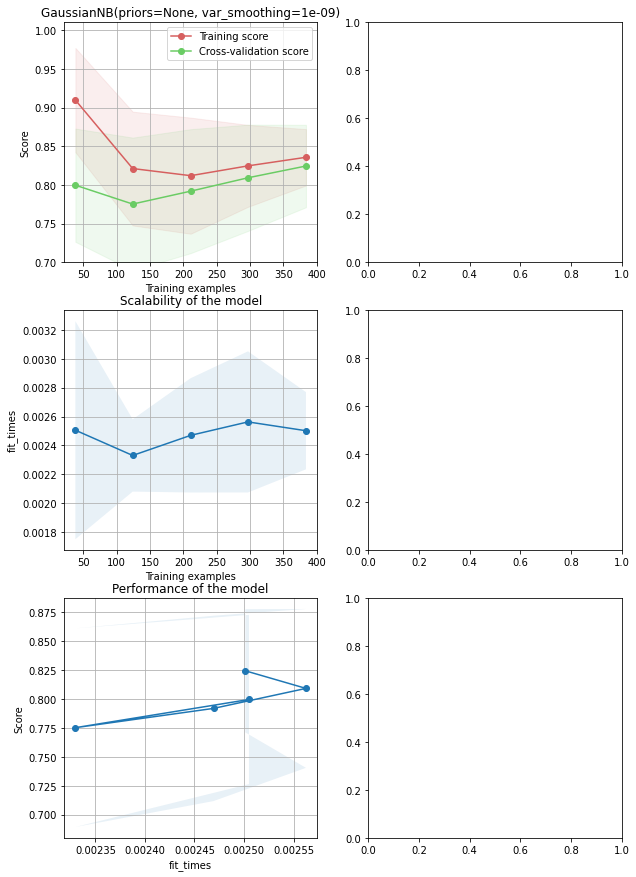

complete !!!
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
LinearDiscriminantAnalysis
****Results****
Accuracy: 90.8333%
Log Loss: 0.23968107854270707
[[105   5]
 [  6   4]]
0.9083333333333333
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.44      0.40      0.42        10

    accuracy                           0.91       120
   macro avg       0.70      0.68      0.69       120
weighted avg       0.90      0.91      0.91       120

--- 0.05452322959899902 seconds ---
10-fold validation test
0.8625
Get performance metrics
Accuracy: 0.908333
Precision: 0.444444
Recall: 0.400000
F1 score: 0.421053
Cohens kappa: 0.371429
ROC AUC: 0.677273
[[105   5]
 [  6   4]]


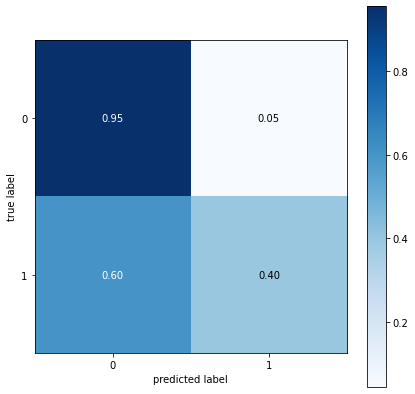

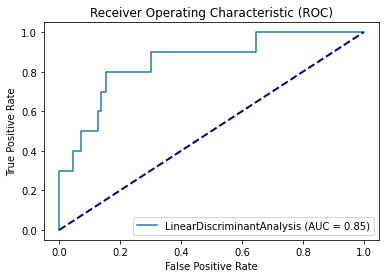

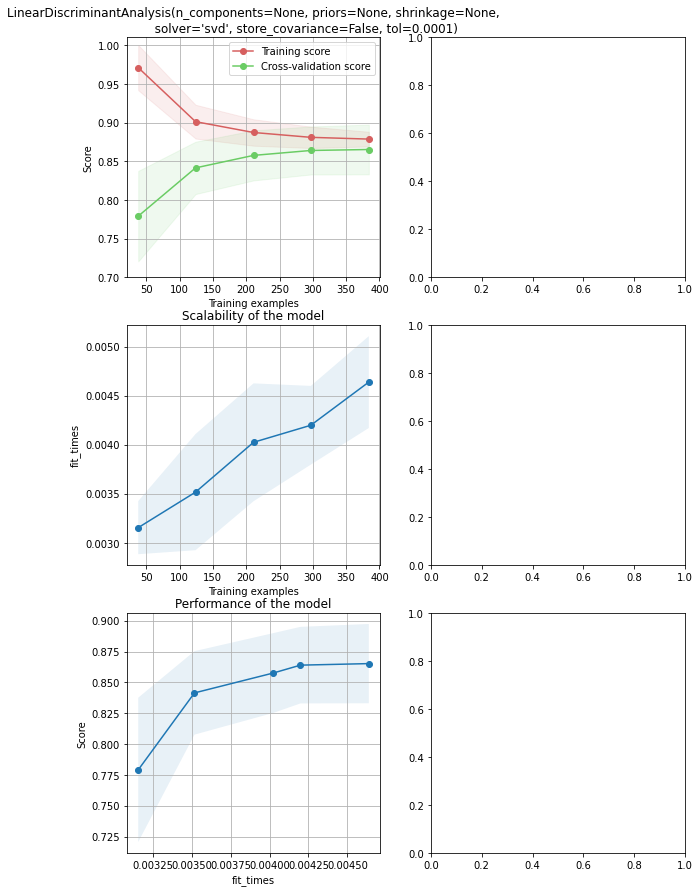

complete !!!
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 91.6667%
Log Loss: 0.31418687608689855
[[103   7]
 [  3   7]]
0.9166666666666666
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       110
           1       0.50      0.70      0.58        10

    accuracy                           0.92       120
   macro avg       0.74      0.82      0.77       120
weighted avg       0.93      0.92      0.92       120

--- 0.05177187919616699 seconds ---
10-fold validation test
0.8520833333333334
Get performance metrics
Accuracy: 0.916667
Precision: 0.500000
Recall: 0.700000
F1 score: 0.583333
Cohens kappa: 0.538462
ROC AUC: 0.818182
[[103   7]
 [  3   7]]


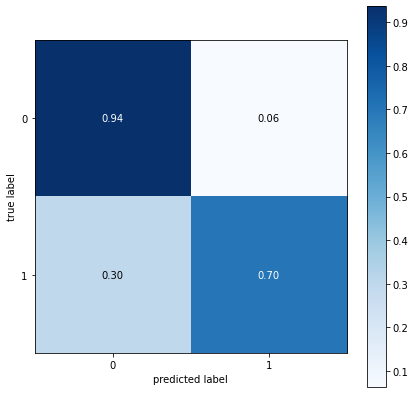

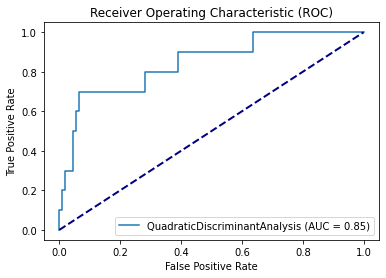

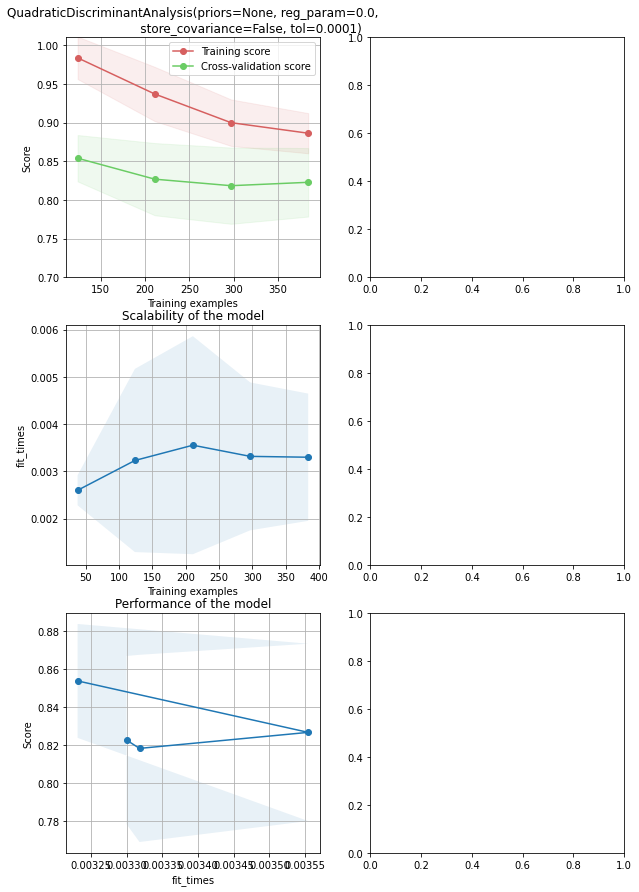

complete !!!


In [ ]:
import time
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    print(clf)
    start_time = time.time()
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__    
    print("="*30)
    print(name)
       
    print('****Results****')
    train_predictions = clf.predict(X_test)
    
    acc = accuracy_score(y_test,train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry) 
    
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))  
    plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    print("--- %s seconds ---" % (time.time() - start_time))
    print("10-fold validation test")
    # 10-Fold Cross validation
    print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
    print("Get performance metrics")
     
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test,y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test,y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test,y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test,y_pred)
    print('F1 score: %f' % f1)
    # kappa
    kappa = cohen_kappa_score(y_test,y_pred)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    auc = roc_auc_score(y_test,y_pred)
    print('ROC AUC: %f' % auc)
    # confusion matrix
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    
    svc_disp = plot_roc_curve(clf, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.show()

    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    X, y = load_digits(return_X_y=True)

    title = clf
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator = clf
    plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

    plt.show()

    print("complete !!!")

print("="*30)

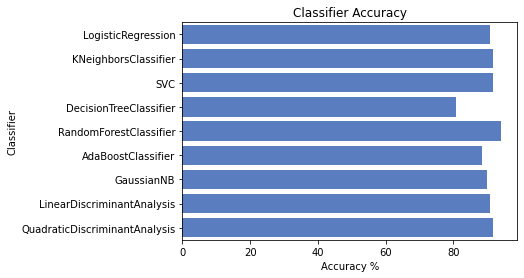

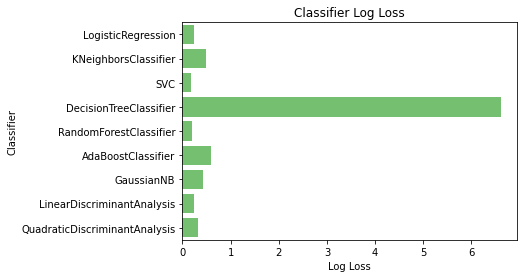

In [ ]:
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()